In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

# Importando base de dados

<p>Base com todos os dados de BH</p>

In [5]:
ws = [329, 343, 363, 370]

In [4]:
dfr = pd.read_csv('../data/bh-calculado.csv')
dfr.head(4)

,wsid,elvt,lat,lon,mdct,prcp,stp,smax,smin,temp,...,dmax_5,dmax_6,prcp_1,prcp_2,prcp_3,prcp_4,prcp_5,prcp_6,prcp_acum_6,prcp_plus_1
0,329,854.0,-19.883945,-43.969397,2006-12-01 00:00:00,0.0,915.4,915.4,914.0,20.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.2,0.0
1,329,854.0,-19.883945,-43.969397,2006-12-01 01:00:00,0.0,916.0,916.0,915.4,20.9,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,15.2,0.4
2,329,854.0,-19.883945,-43.969397,2006-12-01 02:00:00,0.4,916.0,916.2,916.0,20.6,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,15.2,1.8
3,329,854.0,-19.883945,-43.969397,2006-12-01 03:00:00,1.8,915.1,916.0,915.1,20.7,...,NaN,NaN,0.4,0.0,0.0,NaN,NaN,NaN,14.8,12.4


In [41]:
len(dfr)

83784

In [6]:
for w in ws:
    x = dfr.loc[dfr['wsid'].isin([w])].iloc[0:6].index
    dfr.drop(dfr.index[x], inplace=True)

In [7]:
dfm = dfr

In [8]:
REMOVE = [u'prcp',u'prcp_1', u'prcp_2', u'prcp_3', u'prcp_4', u'prcp_5', u'prcp_6']
for v in REMOVE:
    if v in list(dfm.columns):
        dfm = dfm.drop(v,1)

In [10]:
dfm = dfm.dropna()  

In [11]:
len(dfm)

83760

In [12]:
dfm = dfm.reset_index(drop=True)

In [13]:
dfm.head(5)

,wsid,elvt,lat,lon,mdct,stp,smax,smin,temp,tmax,...,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6,prcp_acum_6,prcp_plus_1
0,329,854.0,-19.883945,-43.969397,2006-12-01 06:00:00,913.5,913.8,913.4,20.8,19.0,...,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4,0.0,0.0
1,329,854.0,-19.883945,-43.969397,2006-12-01 07:00:00,913.4,913.6,913.4,20.2,19.3,...,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7,0.0,0.0
2,329,854.0,-19.883945,-43.969397,2006-12-01 08:00:00,914.2,914.2,913.4,20.1,19.4,...,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5,0.2,0.0
3,329,854.0,-19.883945,-43.969397,2006-12-01 09:00:00,915.0,915.0,914.2,20.7,19.4,...,20.1,20.3,19.9,20.2,20.1,20.2,20.4,20.6,0.2,0.0
4,329,854.0,-19.883945,-43.969397,2006-12-01 10:00:00,915.7,915.7,915.0,21.3,19.3,...,19.5,20.1,19.9,19.9,20.2,20.1,20.2,20.4,0.6,0.0


In [14]:
#como esta rede é especifica para a BH, vamos remover elvt, lat, lon
REMOVE = ['elvt','lat', 'lon']
for v in REMOVE:
    dfm = dfm.drop(v,1)

In [15]:
x = dfm[dfm['wsid'].isin([329])]
x.head(4)

,wsid,mdct,stp,smax,smin,temp,tmax,tmin,dewp,dmax,...,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6,prcp_acum_6,prcp_plus_1
0,329,2006-12-01 06:00:00,913.5,913.8,913.4,20.8,19.0,21.0,19.6,20.1,...,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4,0.0,0.0
1,329,2006-12-01 07:00:00,913.4,913.6,913.4,20.2,19.3,20.8,19.7,20.2,...,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7,0.0,0.0
2,329,2006-12-01 08:00:00,914.2,914.2,913.4,20.1,19.4,20.6,19.4,19.9,...,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5,0.2,0.0
3,329,2006-12-01 09:00:00,915.0,915.0,914.2,20.7,19.4,20.7,19.5,19.9,...,20.1,20.3,19.9,20.2,20.1,20.2,20.4,20.6,0.2,0.0


In [16]:
dfm.head(5)

,wsid,mdct,stp,smax,smin,temp,tmax,tmin,dewp,dmax,...,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6,prcp_acum_6,prcp_plus_1
0,329,2006-12-01 06:00:00,913.5,913.8,913.4,20.8,19.0,21.0,19.6,20.1,...,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4,0.0,0.0
1,329,2006-12-01 07:00:00,913.4,913.6,913.4,20.2,19.3,20.8,19.7,20.2,...,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7,0.0,0.0
2,329,2006-12-01 08:00:00,914.2,914.2,913.4,20.1,19.4,20.6,19.4,19.9,...,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5,0.2,0.0
3,329,2006-12-01 09:00:00,915.0,915.0,914.2,20.7,19.4,20.7,19.5,19.9,...,20.1,20.3,19.9,20.2,20.1,20.2,20.4,20.6,0.2,0.0
4,329,2006-12-01 10:00:00,915.7,915.7,915.0,21.3,19.3,21.3,19.3,20.6,...,19.5,20.1,19.9,19.9,20.2,20.1,20.2,20.4,0.6,0.0


In [55]:
CAN_BE_NULL

['wdsp', 'prcp', 'gust']

<h3>Preparando a base</h3>

<p>Removendo registros que não pode ser nulos e prejudicariam o treinamento</p>

In [17]:
cols = list(dfm.columns)

COLS_BE_NULL = ['prcp','wdsp','wdsp_1','wdsp_2','wdsp_3','wdsp_4','wdsp_5','wdsp_6' \
                'gust','gust_1','gust_2','gust_3','gust_4','gust_5','gust_6', 'prcp_acum_6','prcp_plus_1']
for v in COLS_BE_NULL:
    if v in cols:
        cols.remove(v)

In [18]:
dfm[cols] = dfm[cols].replace({0.0:np.nan})
dfm.head(10)

,wsid,mdct,stp,smax,smin,temp,tmax,tmin,dewp,dmax,...,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6,prcp_acum_6,prcp_plus_1
0,329,2006-12-01 06:00:00,913.5,913.8,913.4,20.8,19.0,21.0,19.6,20.1,...,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4,0.0,0.0
1,329,2006-12-01 07:00:00,913.4,913.6,913.4,20.2,19.3,20.8,19.7,20.2,...,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7,0.0,0.0
2,329,2006-12-01 08:00:00,914.2,914.2,913.4,20.1,19.4,20.6,19.4,19.9,...,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5,0.2,0.0
3,329,2006-12-01 09:00:00,915.0,915.0,914.2,20.7,19.4,20.7,19.5,19.9,...,20.1,20.3,19.9,20.2,20.1,20.2,20.4,20.6,0.2,0.0
4,329,2006-12-01 10:00:00,915.7,915.7,915.0,21.3,19.3,21.3,19.3,20.6,...,19.5,20.1,19.9,19.9,20.2,20.1,20.2,20.4,0.6,0.0
5,329,2006-12-01 11:00:00,916.2,916.3,915.7,21.9,19.1,21.9,19.6,21.2,...,19.0,19.5,20.6,19.9,19.9,20.2,20.1,20.2,0.6,0.0
6,329,2006-12-01 12:00:00,916.7,916.7,916.2,22.9,18.9,23.0,19.5,21.9,...,19.1,19.0,21.2,20.6,19.9,19.9,20.2,20.1,0.6,0.2
7,329,2006-12-01 13:00:00,916.9,916.9,916.7,22.2,19.0,23.2,19.5,22.2,...,19.1,19.1,21.9,21.2,20.6,19.9,19.9,20.2,0.6,0.0
8,329,2006-12-01 14:00:00,916.9,917.0,916.9,22.9,18.7,23.0,19.7,21.8,...,19.2,19.1,22.2,21.9,21.2,20.6,19.9,19.9,0.4,0.4
9,329,2006-12-01 15:00:00,916.9,917.1,916.9,22.6,18.4,23.1,19.9,22.1,...,18.8,19.2,21.8,22.2,21.9,21.2,20.6,19.9,0.4,0.0


In [19]:
len(dfm)

83760

In [20]:
dfm = dfm.dropna()

In [21]:
len(dfm)

67144

In [22]:
dfm.head(5)

,wsid,mdct,stp,smax,smin,temp,tmax,tmin,dewp,dmax,...,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6,prcp_acum_6,prcp_plus_1
0,329,2006-12-01 06:00:00,913.5,913.8,913.4,20.8,19.0,21.0,19.6,20.1,...,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4,0.0,0.0
1,329,2006-12-01 07:00:00,913.4,913.6,913.4,20.2,19.3,20.8,19.7,20.2,...,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7,0.0,0.0
2,329,2006-12-01 08:00:00,914.2,914.2,913.4,20.1,19.4,20.6,19.4,19.9,...,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5,0.2,0.0
4,329,2006-12-01 10:00:00,915.7,915.7,915.0,21.3,19.3,21.3,19.3,20.6,...,19.5,20.1,19.9,19.9,20.2,20.1,20.2,20.4,0.6,0.0
5,329,2006-12-01 11:00:00,916.2,916.3,915.7,21.9,19.1,21.9,19.6,21.2,...,19.0,19.5,20.6,19.9,19.9,20.2,20.1,20.2,0.6,0.0


In [23]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67144 entries, 0 to 83759
Columns: 115 entries, wsid to prcp_plus_1
dtypes: float64(107), int64(1), object(7)
memory usage: 59.4+ MB


In [24]:
dfm = dfm.drop('wsid',1)
dfm = dfm.drop('mdct',1)

In [25]:
dfm.head(4)

,stp,smax,smin,temp,tmax,tmin,dewp,dmax,dmin,hmdy,...,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6,prcp_acum_6,prcp_plus_1
0,913.5,913.8,913.4,20.8,19.0,21.0,19.6,20.1,19.0,90.0,...,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4,0.0,0.0
1,913.4,913.6,913.4,20.2,19.3,20.8,19.7,20.2,19.1,95.0,...,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7,0.0,0.0
2,914.2,914.2,913.4,20.1,19.4,20.6,19.4,19.9,19.1,96.0,...,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5,0.2,0.0
4,915.7,915.7,915.0,21.3,19.3,21.3,19.3,20.6,18.8,88.0,...,19.5,20.1,19.9,19.9,20.2,20.1,20.2,20.4,0.6,0.0


In [26]:
REMOVE = [u'mdct',u'mdct_1', u'mdct_2', u'mdct_3', u'mdct_4', u'mdct_5', u'mdct_6']
for v in REMOVE:
    if v in list(dfm.columns):
        dfm = dfm.drop(v,1)

In [27]:
dfm.columns

Index([u'stp', u'smax', u'smin', u'temp', u'tmax', u'tmin', u'dewp', u'dmax',
       u'dmin', u'hmdy',
       ...
       u'dmin_5', u'dmin_6', u'dmax_1', u'dmax_2', u'dmax_3', u'dmax_4',
       u'dmax_5', u'dmax_6', u'prcp_acum_6', u'prcp_plus_1'],
      dtype='object', length=107)

<h2>Mineiração dos dados</h2>

<h3>Rede neural</h3>

In [53]:
import tensorflow as tf  
from sklearn.metrics import explained_variance_score, mean_absolute_error,  median_absolute_error, r2_score
from sklearn.model_selection import train_test_split 

In [29]:
target = 'prcp_plus_1'

In [30]:
X =  dfm[[col for col in dfm.columns]]
y = dfm[target]

<p>Separando o conjunto de treinamento e validação (metade dos 10% separados para validação)</p>

In [31]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3, random_state=12) 
print len(X_train)
print len(X_tmp)

47000
20144


<p>Separando o conjunto de testes</p>

In [32]:
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5)

In [33]:
X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))  

Training instances   47000, Training features   107
Validation instances 10072, Validation features 107
Testing instances    10072, Testing features    107


In [34]:
# Zarate instructions
st_units = (X_train.shape[1] * 2) + 1
sd_units = X_train.shape[1] 
#activation_fn = tf.sigmoid
batch_size = 1000
up = int(len(X_train)/batch_size)

In [35]:
Z = X.copy()
Z.pop(target)
feature_cols = [tf.feature_column.numeric_column(col) for col in Z.columns] 

In [37]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols
                                      ,hidden_units=[st_units,sd_units]
                                      #,activation_fn=activation_fn
                                      ,model_dir='/tmp/tf_wx_model-25')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11666be10>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/tmp/tf_wx_model-25', '_save_summary_steps': 100}


In [38]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=batch_size):      
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [47]:
evaluations = []  
STEPS = 500  

for i in range(1, up):

    print ('treinando agora...')
    
    regressor.train(
        input_fn=wx_input_fn(X_train
                            ,y_train)
        , steps=STEPS)
    
    evaluations.append(
        regressor.evaluate(input_fn=wx_input_fn(X_val
                                                ,y_val
                                                ,num_epochs=1
                                                ,shuffle=False)))

treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-9200
INFO:tensorflow:Saving checkpoints for 9201 into /tmp/tf_wx_model-25/model.ckpt.
INFO:tensorflow:loss = 10417.662, step = 9201
INFO:tensorflow:global_step/sec: 8.0516
INFO:tensorflow:loss = 14833.873, step = 9301 (12.421 sec)
INFO:tensorflow:global_step/sec: 8.15604
INFO:tensorflow:loss = 14389.471, step = 9401 (12.261 sec)
INFO:tensorflow:global_step/sec: 8.00972
INFO:tensorflow:loss = 12883.635, step = 9501 (12.485 sec)
INFO:tensorflow:global_step/sec: 8.09841
INFO:tensorflow:loss = 21719.57, step = 9601 (12.349 sec)
INFO:tensorflow:Saving checkpoints for 9700 into /tmp/tf_wx_model-25/model.ckpt.
INFO:tensorflow:Loss for final step: 15599.355.
INFO:tensorflow:Starting evaluation at 2018-03-23-02:17:03
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-9700
INFO:tensorflow:Finished evaluation at 2018-03-23-02:17:06
INFO:tens

INFO:tensorflow:global_step/sec: 8.02918
INFO:tensorflow:loss = 18350.06, step = 13001 (12.454 sec)
INFO:tensorflow:global_step/sec: 8.12906
INFO:tensorflow:loss = 8426.389, step = 13101 (12.302 sec)
INFO:tensorflow:Saving checkpoints for 13200 into /tmp/tf_wx_model-25/model.ckpt.
INFO:tensorflow:Loss for final step: 8858.202.
INFO:tensorflow:Starting evaluation at 2018-03-23-02:26:32
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-13200
INFO:tensorflow:Finished evaluation at 2018-03-23-02:26:35
INFO:tensorflow:Saving dict for global step 13200: average_loss = 9.420975, global_step = 13200, loss = 8626.187
treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-13200
INFO:tensorflow:Saving checkpoints for 13201 into /tmp/tf_wx_model-25/model.ckpt.
INFO:tensorflow:loss = 13161.87, step = 13201
INFO:tensorflow:global_step/sec: 8.02131
INFO:tensorflow:loss = 7723.103, step = 13301 (12.

INFO:tensorflow:Finished evaluation at 2018-03-23-02:36:05
INFO:tensorflow:Saving dict for global step 16700: average_loss = 7.517021, global_step = 16700, loss = 6882.858
treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-16700
INFO:tensorflow:Saving checkpoints for 16701 into /tmp/tf_wx_model-25/model.ckpt.
INFO:tensorflow:loss = 7775.623, step = 16701
INFO:tensorflow:global_step/sec: 7.73789
INFO:tensorflow:loss = 11311.155, step = 16801 (12.925 sec)
INFO:tensorflow:global_step/sec: 7.66946
INFO:tensorflow:loss = 6322.594, step = 16901 (13.039 sec)
INFO:tensorflow:global_step/sec: 7.90208
INFO:tensorflow:loss = 19203.088, step = 17001 (12.655 sec)
INFO:tensorflow:global_step/sec: 7.87115
INFO:tensorflow:loss = 6945.6606, step = 17101 (12.704 sec)
INFO:tensorflow:Saving checkpoints for 17200 into /tmp/tf_wx_model-25/model.ckpt.
INFO:tensorflow:Loss for final step: 8603.807.
INFO:tensorflow:Starting e

INFO:tensorflow:global_step/sec: 8.05388
INFO:tensorflow:loss = 5894.337, step = 20301 (12.417 sec)
INFO:tensorflow:global_step/sec: 8.23651
INFO:tensorflow:loss = 4010.7239, step = 20401 (12.142 sec)
INFO:tensorflow:global_step/sec: 8.2199
INFO:tensorflow:loss = 4424.8945, step = 20501 (12.165 sec)
INFO:tensorflow:global_step/sec: 8.14541
INFO:tensorflow:loss = 7065.7217, step = 20601 (12.276 sec)
INFO:tensorflow:Saving checkpoints for 20700 into /tmp/tf_wx_model-25/model.ckpt.
INFO:tensorflow:Loss for final step: 7021.1973.
INFO:tensorflow:Starting evaluation at 2018-03-23-02:46:55
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-20700
INFO:tensorflow:Finished evaluation at 2018-03-23-02:46:57
INFO:tensorflow:Saving dict for global step 20700: average_loss = 6.112264, global_step = 20700, loss = 5596.6113
treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-20700
INFO:tensorflow

INFO:tensorflow:Loss for final step: 4790.688.
INFO:tensorflow:Starting evaluation at 2018-03-23-02:56:24
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-24200
INFO:tensorflow:Finished evaluation at 2018-03-23-02:56:27
INFO:tensorflow:Saving dict for global step 24200: average_loss = 5.318786, global_step = 24200, loss = 4870.0737
treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-24200
INFO:tensorflow:Saving checkpoints for 24201 into /tmp/tf_wx_model-25/model.ckpt.
INFO:tensorflow:loss = 5140.3735, step = 24201
INFO:tensorflow:global_step/sec: 7.87297
INFO:tensorflow:loss = 5950.5405, step = 24301 (12.702 sec)
INFO:tensorflow:global_step/sec: 8.04802
INFO:tensorflow:loss = 7258.3438, step = 24401 (12.426 sec)
INFO:tensorflow:global_step/sec: 7.99197
INFO:tensorflow:loss = 4032.4827, step = 24501 (12.513 sec)
INFO:tensorflow:global_step/sec: 7.70862
INFO:tensorflow:loss = 1516

INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-27700
INFO:tensorflow:Saving checkpoints for 27701 into /tmp/tf_wx_model-25/model.ckpt.
INFO:tensorflow:loss = 8026.384, step = 27701
INFO:tensorflow:global_step/sec: 8.43808
INFO:tensorflow:loss = 2972.9807, step = 27801 (11.852 sec)
INFO:tensorflow:global_step/sec: 8.22099
INFO:tensorflow:loss = 16754.75, step = 27901 (12.173 sec)
INFO:tensorflow:global_step/sec: 8.38149
INFO:tensorflow:loss = 3721.535, step = 28001 (11.922 sec)
INFO:tensorflow:global_step/sec: 8.44729
INFO:tensorflow:loss = 2912.1455, step = 28101 (11.838 sec)
INFO:tensorflow:Saving checkpoints for 28200 into /tmp/tf_wx_model-25/model.ckpt.
INFO:tensorflow:Loss for final step: 6385.8438.
INFO:tensorflow:Starting evaluation at 2018-03-23-03:07:12
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-28200
INFO:tensorflow:Finished evaluation at 2018-03-23-03:07:15
INFO:tensorflow:Saving dict for global step 28200: average_loss 

INFO:tensorflow:global_step/sec: 7.84717
INFO:tensorflow:loss = 5796.6836, step = 31501 (12.742 sec)
INFO:tensorflow:global_step/sec: 8.18492
INFO:tensorflow:loss = 2756.8765, step = 31601 (12.217 sec)
INFO:tensorflow:Saving checkpoints for 31700 into /tmp/tf_wx_model-25/model.ckpt.
INFO:tensorflow:Loss for final step: 2931.8838.
INFO:tensorflow:Starting evaluation at 2018-03-23-03:16:55
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-31700
INFO:tensorflow:Finished evaluation at 2018-03-23-03:16:58
INFO:tensorflow:Saving dict for global step 31700: average_loss = 4.361653, global_step = 31700, loss = 3993.6877
treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-31700
INFO:tensorflow:Saving checkpoints for 31701 into /tmp/tf_wx_model-25/model.ckpt.
INFO:tensorflow:loss = 4492.049, step = 31701
INFO:tensorflow:global_step/sec: 8.15394
INFO:tensorflow:loss = 2819.5461, step = 31801

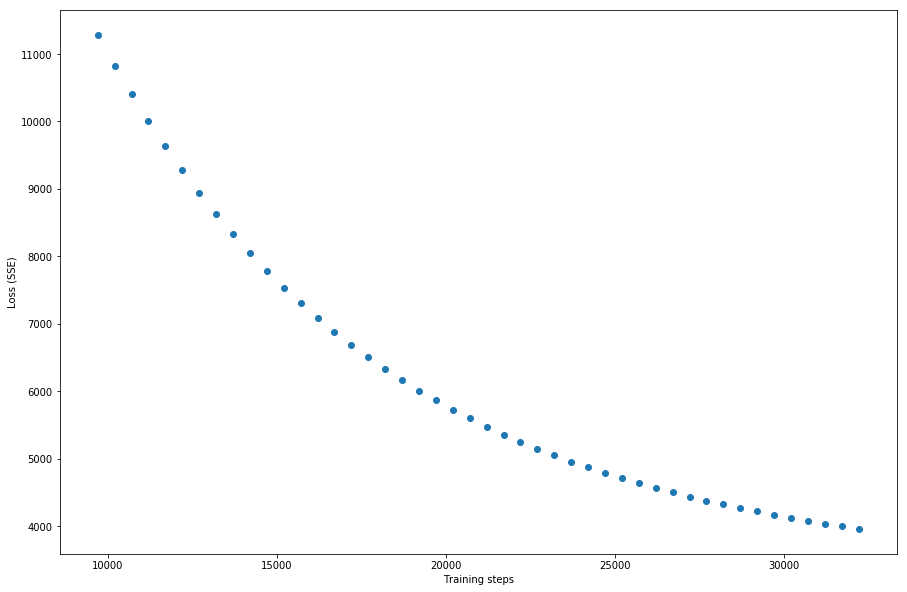

In [50]:
import matplotlib.pyplot as plt  
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 10]

loss_values = [ev['loss'] for ev in evaluations]  
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)  
plt.xlabel('Training steps')  
plt.ylabel('Loss (SSE)')  
plt.show()  

In [51]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,  
                                              num_epochs=1,
                                              shuffle=False))

predictions = np.array([p['predictions'][0] for p in pred])

INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-25/model.ckpt-32200


In [54]:
print("The Explained Variance: %.2f" % explained_variance_score(  
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f " % mean_absolute_error(  
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f " % median_absolute_error(  
                                            y_test, predictions))
print("R^2 (coefficient of determination): %.2f " % r2_score(  
                                            y_test, predictions))

The Explained Variance: 0.02
The Mean Absolute Error: 1.14 
The Median Absolute Error: 0.69 
R^2 (coefficient of determination): 0.02 


In [55]:
predictions

array([-1.7512861 ,  3.4451616 ,  0.99682784, ..., -1.4713595 ,
       -0.9034121 , -1.0312192 ], dtype=float32)

In [56]:
predictions.size

10072

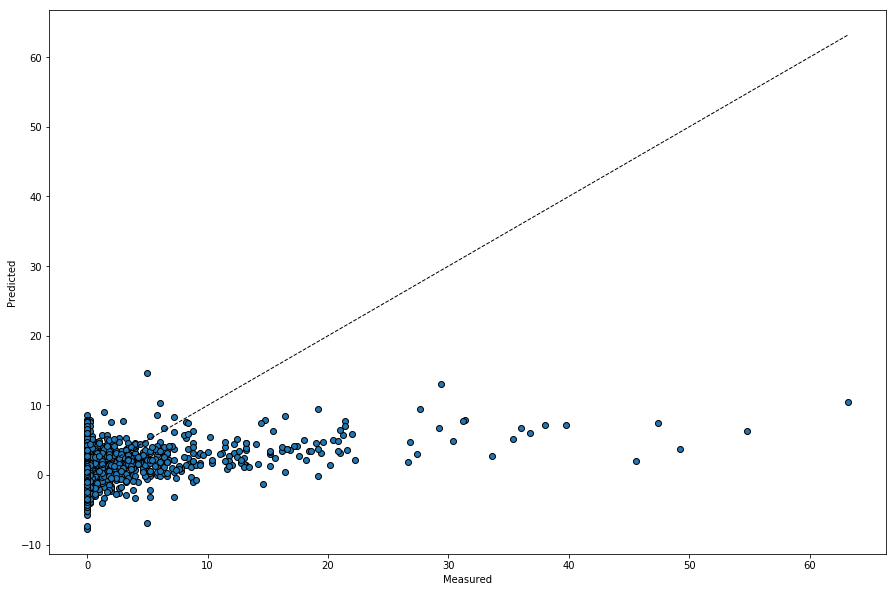

In [57]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()